# Algoritmos de Machine Learning

En este Notebook, usaremos los Dataframes creados en el Notebook de Features para entrenar distintos modelos de Machine Learning y predecir si los tweets son reales o no.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings 
warnings.filterwarnings('ignore')

## Carga de dataframes

In [2]:
train_df = pd.read_csv('../Data/train_features.csv', encoding='latin-1',dtype={'id': np.uint16,'target': np.bool})
test_df = pd.read_csv('../Data/test_features.csv', encoding='latin-1',dtype={'id': np.uint16})
sample_submission = pd.read_csv('../Data/sample_submission.csv')

In [3]:
train_df.head(2)

,id,target,cantidad_de_palabras,longitud_del_tweet,longitud_categ,tiene_menciones,es_expresivo,cantidad_de_hashtags,tiene_links,location_unico,keyword_encoded,tfidf_score
0,1,True,13,69,0.285123,0,0,1,0,0,0.527739,18.132632
1,4,True,7,38,0.285123,0,0,0,0,0,0.527739,39.483954


In [4]:
test_df.head(2)

,id,cantidad_de_palabras,longitud_del_tweet,longitud_categ,tiene_menciones,es_expresivo,cantidad_de_hashtags,tiene_links,location_unico,keyword_encoded,tfidf_score
0,0,6,34,0.285123,0,0,0,0,0,0.527739,74.111794
1,2,9,64,0.285123,0,0,1,0,0,0.527739,0.000000


## Algoritmos

### Random Forest

###### Entrenamiento

In [42]:
X = train_df.sort_values(by='id',ascending=True).iloc[:,2:]
Y = train_df.sort_values(by='id',ascending=True).iloc[:,1]

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=15,min_samples_split=20)
rf_classifier.fit(X_train, Y_train)
Y_pred = rf_classifier.predict(X_test)

In [45]:
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

              precision    recall  f1-score   support

       False       0.78      0.88      0.82       884
        True       0.79      0.65      0.72       639

    accuracy                           0.78      1523
   macro avg       0.78      0.76      0.77      1523
weighted avg       0.78      0.78      0.78      1523

0.7826657912015759


Analizamos la importancia de los features.

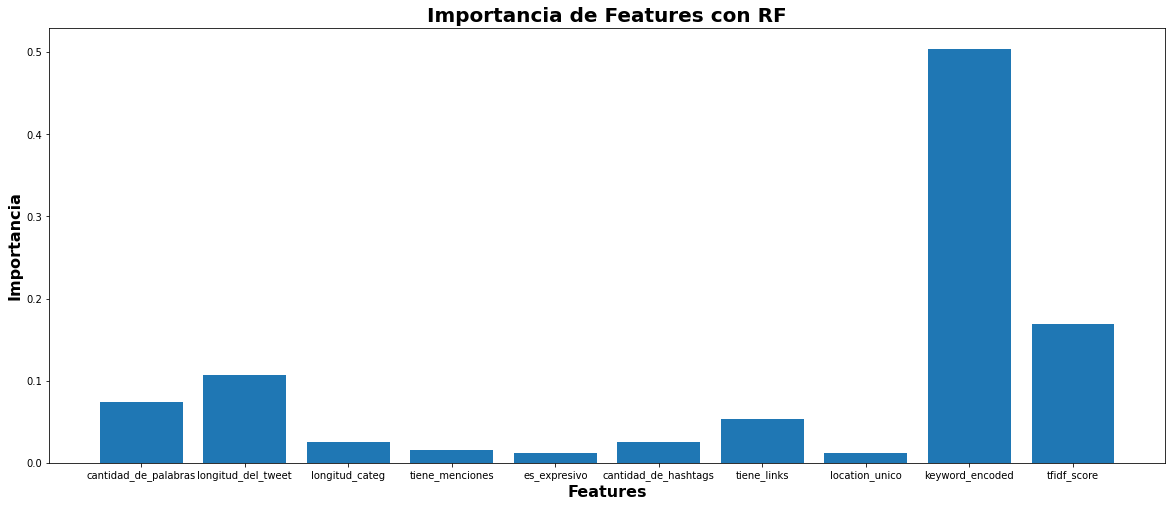

In [46]:
plt.figure(figsize=(20,8))

plt.bar(X.columns, rf_classifier.feature_importances_)

plt.xlabel('Features', fontsize=16, fontweight='bold')
plt.ylabel('Importancia', fontsize=16, fontweight='bold')
plt.title('Importancia de Features con RF', fontsize=20, fontweight='bold')

plt.show()

###### Predicción

In [47]:
registros_a_predecir = test_df.sort_values(by='id',ascending=True).iloc[:,1:]

In [48]:
prediccion_RF = rf_classifier.predict(registros_a_predecir)
prediccion_RF = prediccion_RF.astype(int)

Damos el formato para realizar el submit.

In [49]:
resultado_RF = pd.DataFrame({'id':sample_submission['id'].values.tolist(),'target':prediccion_RF})

In [50]:
resultado_RF.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [51]:
resultado_RF.to_csv('..\Predicciones\prediccion_RF.csv',index=False)

### XGBoost

###### Entrenamiento

In [52]:
from xgboost import XGBClassifier
import xgboost as xgb

In [53]:
xgboost = XGBClassifier(max_depth=1,
              objective= 'binary:logistic',
              nthread=4,n_estimators=2000,
              learning_rate=0.02,
              colsample_bytree=0.75)
xgboost.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
Y_pred = xgboost.predict(X_test)

In [55]:
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

              precision    recall  f1-score   support

       False       0.79      0.86      0.82       884
        True       0.77      0.68      0.72       639

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523

0.7806959947472094


Analizamos la importancia de los features con XGBOOST.

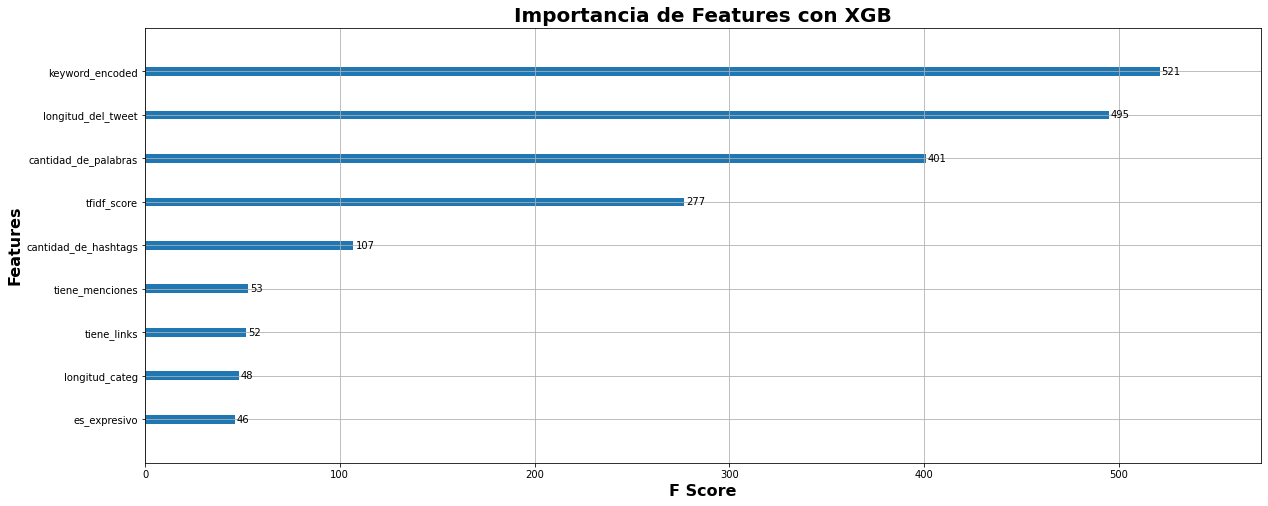

In [56]:
plt.rcParams['figure.figsize'] = [20, 8]
xgb.plot_importance(xgboost)

plt.xlabel('F Score', fontsize=16, fontweight='bold')
plt.ylabel('Features', fontsize=16, fontweight='bold')
plt.title('Importancia de Features con XGB', fontsize=20, fontweight='bold')

plt.show()

###### Predicción

In [57]:
registros_a_predecir = test_df.sort_values(by='id',ascending=True).iloc[:,1:]

In [58]:
prediccion_XGB = xgboost.predict(registros_a_predecir)
prediccion_XGB = prediccion_XGB.astype(int)

Damos el formato para realizar el submit.

In [59]:
resultado_XGB = pd.DataFrame({'id':sample_submission['id'].values.tolist(),'target':prediccion_XGB})

In [60]:
resultado_XGB.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [61]:
resultado_XGB.to_csv('..\Predicciones\prediccion_XGB.csv',index=False)

### Perceptrón Multicapa

###### Entrenamiento

In [105]:
X = train_df.iloc[:,2:]
Y = train_df.iloc[:,1]

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

Normalizamos los campos.

In [107]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=500,
                    solver='adam',learning_rate_init=3e-4)
mlp.fit(X_train, Y_train)
Y_pred = mlp.predict(X_test)

In [109]:
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

              precision    recall  f1-score   support

       False       0.77      0.84      0.81       854
        True       0.77      0.68      0.72       669

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.77      1523
weighted avg       0.77      0.77      0.77      1523

0.7721602101116218


###### Predicción

In [110]:
registros_a_predecir = test_df.iloc[:,1:]
registros_a_predecir = scaler.transform(registros_a_predecir)

In [111]:
prediccion_MLP = mlp.predict(registros_a_predecir)
prediccion_MLP = prediccion_MLP.astype(int)

Damos el formato para realizar el submit.

In [112]:
resultado_MLP = pd.DataFrame({'id':sample_submission['id'].values.tolist(),'target':prediccion_MLP})

In [113]:
resultado_MLP.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [115]:
resultado_MLP.to_csv('..\Predicciones\prediccion_MLP.csv',index=False)


### Redes Neuronales usando Keras

In [5]:
from keras.models import Sequential, Model
from keras import layers
from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

Importamos los archivos creados en el Notebook de Features para predecir usando Embeddings.

In [6]:
tweets_padded = pd.read_csv('../Data/tweets_padded.csv', encoding='latin-1')
matriz_de_embeddings = pd.read_csv('../Data/matriz_de_embeddings.csv', encoding='latin-1')

In [7]:
tweets_padded = tweets_padded.to_numpy()
matriz_de_embeddings = matriz_de_embeddings.to_numpy()

In [8]:
train_embeddings = tweets_padded[:train_df.shape[0]]
test_embeddings = tweets_padded[train_df.shape[0]:]

#### Primer modelo (Solo Embeddings)

###### Entrenamiento

In [9]:
model = Sequential()

model.add(layers.Embedding(matriz_de_embeddings.shape[0],matriz_de_embeddings.shape[1],\
                           embeddings_initializer=Constant(matriz_de_embeddings),\
                           input_length = train_embeddings.shape[1],trainable = False))
model.add(layers.SpatialDropout1D(0.2))
model.add(layers.LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=3e-4),metrics=['accuracy'])

Veamos el detalle del modelo que vamos a utilizar.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 100)           2027200   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 100)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 2,107,701
Trainable params: 80,501
Non-trainable params: 2,027,200
_________________________________________________________________


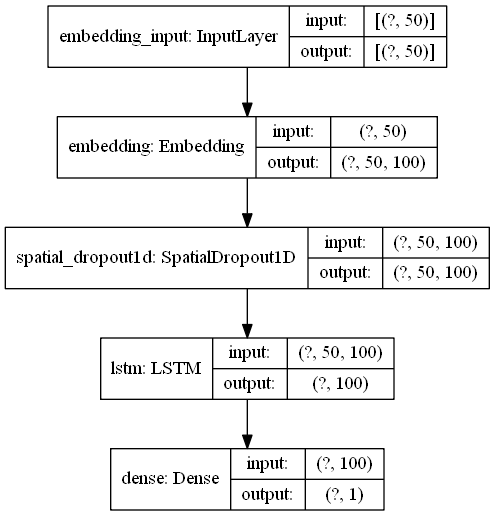

In [22]:
plot_model(model, to_file='modelo1_plot.png', show_shapes=True, show_layer_names=True)

Realizamos el split en train y tesr de los dataframes y entrenamos el modelo.

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(train_embeddings,train_df['target'].values,test_size=0.2)

In [24]:
model.fit(X_train,Y_train,batch_size=32,epochs=20,validation_data=(X_test,Y_test),verbose=2)

Epoch 1/20
191/191 - 12s - loss: 0.5572 - accuracy: 0.7131 - val_loss: 0.4983 - val_accuracy: 0.7833
Epoch 2/20
191/191 - 10s - loss: 0.4803 - accuracy: 0.7831 - val_loss: 0.4696 - val_accuracy: 0.7919
Epoch 3/20
191/191 - 9s - loss: 0.4688 - accuracy: 0.7916 - val_loss: 0.4817 - val_accuracy: 0.7932
Epoch 4/20
191/191 - 10s - loss: 0.4581 - accuracy: 0.7954 - val_loss: 0.4604 - val_accuracy: 0.7951
Epoch 5/20
191/191 - 13s - loss: 0.4499 - accuracy: 0.7943 - val_loss: 0.4468 - val_accuracy: 0.7991
Epoch 6/20
191/191 - 9s - loss: 0.4527 - accuracy: 0.7969 - val_loss: 0.4492 - val_accuracy: 0.7978
Epoch 7/20
191/191 - 10s - loss: 0.4484 - accuracy: 0.7970 - val_loss: 0.4510 - val_accuracy: 0.8030
Epoch 8/20
191/191 - 10s - loss: 0.4500 - accuracy: 0.8003 - val_loss: 0.4594 - val_accuracy: 0.7919
Epoch 9/20
191/191 - 10s - loss: 0.4351 - accuracy: 0.8041 - val_loss: 0.4729 - val_accuracy: 0.7991
Epoch 10/20
191/191 - 11s - loss: 0.4416 - accuracy: 0.8061 - val_loss: 0.4423 - val_accuracy

In [25]:
score = model.evaluate(X_test,Y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4567945599555969
Test accuracy: 0.810899555683136


###### Predicción

In [116]:
registros_a_predecir = test_embeddings

In [117]:
prediccion = model.predict(registros_a_predecir)
prediccion = np.round(prediccion).astype(int).reshape(3263)

In [118]:
resultado_EM = pd.DataFrame({'id':sample_submission['id'].values.tolist(),'target':prediccion})

In [119]:
resultado_EM.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [120]:
resultado_EM.to_csv('..\Predicciones\prediccion_EM.csv',index=False)

#### Segundo modelo (Embeddings + features)

###### Entrenamiento

In [26]:
train_features = train_df.iloc[:,2:]
test_features = test_df.iloc[:,1:]

In [27]:
def crear_modelo():
    nlp_input = layers.Input(shape=(train_embeddings.shape[1],), name='nlp_input')
    x = layers.Embedding(matriz_de_embeddings.shape[0],matriz_de_embeddings.shape[1],\
                     embeddings_initializer=Constant(matriz_de_embeddings),trainable = False)(nlp_input)
    x = layers.SpatialDropout1D(0.2)(x)
    nlp_out = layers.LSTM(100,dropout=0.2,recurrent_dropout=0.2)(x)

    features_input = layers.Input(shape=(train_features.shape[1],), name='features_input')
    features_out = layers.Dense(4, activation="relu")(features_input)

    concat = layers.Concatenate(axis=1)
    x = concat([nlp_out,features_out])
    x = layers.Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[nlp_input,features_input], outputs=[x])
    model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=3e-4),metrics=['accuracy'])
    
    return model

Veamos el detalle del modelo que vamos a utilizar.

In [29]:
modelo = crear_modelo()
modelo.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
nlp_input (InputLayer)          [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 100)      2027200     nlp_input[0][0]                  
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 50, 100)      0           embedding_1[0][0]                
__________________________________________________________________________________________________
features_input (InputLayer)     [(None, 10)]         0                                            
______________________________________________________________________________________________

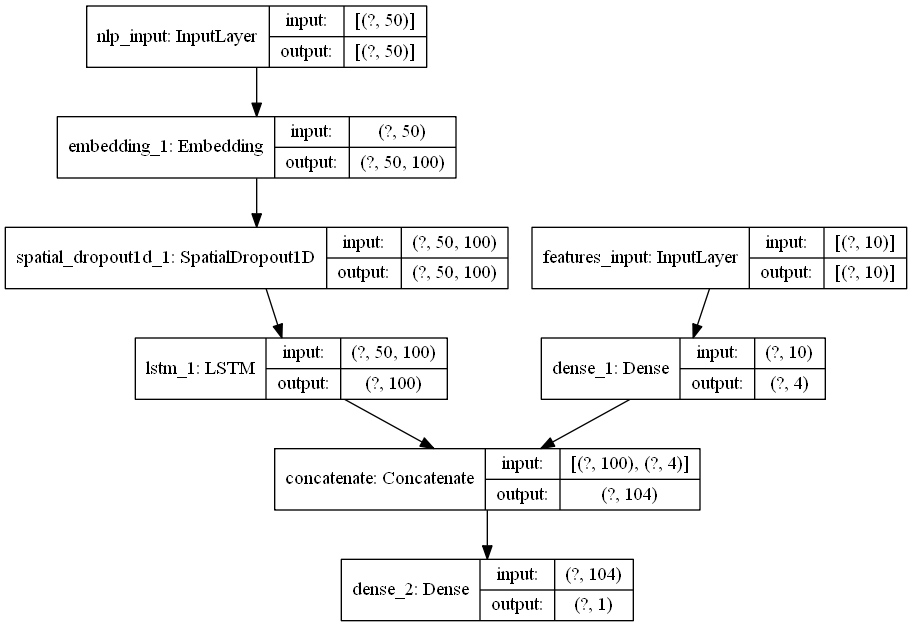

In [30]:
plot_model(modelo, to_file='modelo2_plot.png', show_shapes=True, show_layer_names=True)

Realizamos el split en train y tesr de los dataframes y entrenamos el modelo.

In [31]:
e_train,e_test,f_train,f_test,Y_train,Y_test = train_test_split(train_embeddings,train_features,train_df['target'].values,\
                                                                test_size=0.2)

Normalizamos los features.

In [32]:
scaler = StandardScaler()
scaler.fit(f_train)
f_train = scaler.transform(f_train)
f_test = scaler.transform(f_test)
test_norm = scaler.transform(test_features)

Usamos un CheckPoint para guardar los pesos óptimos del entrenamiento.

In [33]:
cp = ModelCheckpoint('pesos.h5', monitor='val_loss', save_best_only=True)

In [34]:
modelo.fit([e_train,f_train],Y_train,\
           batch_size=32,\
           epochs=30,\
           validation_data=([e_test,f_test],Y_test),\
           callbacks=[cp],\
           verbose=2)

Epoch 1/30
191/191 - 15s - loss: 0.5469 - accuracy: 0.7222 - val_loss: 0.4527 - val_accuracy: 0.8050
Epoch 2/30
191/191 - 12s - loss: 0.4776 - accuracy: 0.7870 - val_loss: 0.4581 - val_accuracy: 0.8096
Epoch 3/30
191/191 - 12s - loss: 0.4637 - accuracy: 0.7923 - val_loss: 0.4753 - val_accuracy: 0.7932
Epoch 4/30
191/191 - 15s - loss: 0.4643 - accuracy: 0.7920 - val_loss: 0.4398 - val_accuracy: 0.8122
Epoch 5/30
191/191 - 13s - loss: 0.4531 - accuracy: 0.7975 - val_loss: 0.4223 - val_accuracy: 0.8221
Epoch 6/30
191/191 - 14s - loss: 0.4439 - accuracy: 0.7995 - val_loss: 0.4179 - val_accuracy: 0.8188
Epoch 7/30
191/191 - 11s - loss: 0.4374 - accuracy: 0.8033 - val_loss: 0.4442 - val_accuracy: 0.8070
Epoch 8/30
191/191 - 10s - loss: 0.4384 - accuracy: 0.8049 - val_loss: 0.4204 - val_accuracy: 0.8240
Epoch 9/30
191/191 - 12s - loss: 0.4279 - accuracy: 0.8082 - val_loss: 0.4187 - val_accuracy: 0.8221
Epoch 10/30
191/191 - 15s - loss: 0.4257 - accuracy: 0.8117 - val_loss: 0.4140 - val_accura

In [35]:
modelo.load_weights('pesos.h5')

In [36]:
score = modelo.evaluate([e_test,f_test],Y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4003184139728546
Test accuracy: 0.8351936936378479


###### Predicción

In [37]:
registros_a_predecir = [test_embeddings,test_norm]

In [38]:
prediccion = modelo.predict(registros_a_predecir)
prediccion = np.round(prediccion).astype(int).reshape(3263)

In [39]:
resultado_RN = pd.DataFrame({'id':sample_submission['id'].values.tolist(),'target':prediccion})

In [40]:
resultado_RN.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [41]:
resultado_RN.to_csv('..\Predicciones\prediccion_RN.csv',index=False)

###### Majority Voting (Falta mejorar, tarda 5 minutos por iteración aprox asi que cuidado al correr con muchas iteraciones)

Viendo que los resultados de las predicciones con el modelo suelen ser variadas (no predicen siempre las mismas clases para los mismos ids), vamos a probar hacer un Majority Voting entre las predicciones.

In [128]:
n_iteraciones = 1
prediccion_parcial_dec = np.zeros(3263)
prediccion_parcial_int = np.zeros(3263).astype(int)

for i in range(1,n_iteraciones+1):
    modelo = crear_modelo()
    
    e_train,e_test,f_train,f_test,Y_train,Y_test = train_test_split(train_embeddings,train_features,train_df['target'].values,\
                                                                test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(f_train)
    f_train = scaler.transform(f_train)
    f_test = scaler.transform(f_test)
    test_norm = scaler.transform(test_features)
    
    #cp = ModelCheckpoint('pesos.h5', monitor='val_loss', save_best_only=True)
    
    history = modelo.fit([e_train,f_train],Y_train,\
           batch_size=32,\
           epochs=20,\
           validation_data=([e_test,f_test],Y_test),\
           #callbacks=[cp],\
           verbose=2)
    
    #modelo.load_weights('pesos.h5')
    
    registros_a_predecir = [test_embeddings,test_norm]
    prediccion = modelo.predict(registros_a_predecir)
    
    prediccion_parcial_dec = prediccion_parcial_dec + prediccion.reshape(3263) #Prediccion parcial decimal.
    prediccion_parcial_int = prediccion_parcial_int + np.round(prediccion).astype(int).reshape(3263)
    
    prediccion_individual = np.round(prediccion).astype(int).reshape(3263) #Prediccion de la iteracion.
    prediccion_acumulativa_dec = np.round(prediccion_parcial_dec / i).astype(int).reshape(3263) #Prediccion de sumar decimales.
    prediccion_acumulativa_int = np.round(prediccion_parcial_int / i).astype(int).reshape(3263) #Prediccion de sumar enteros.
    
    resultado_individual = pd.DataFrame({'id':sample_submission['id'].values.tolist(),'target':prediccion_individual})
    resultado_individual.to_csv('..\Predicciones\prediccionRN'+str(i)+'.csv',index=False)
    
    if ((i % 2 == 1) & (i>= 3)):
        resultado_acumulativa_dec = pd.DataFrame({'id':sample_submission['id'].values.tolist(),'target':prediccion_acumulativa_dec})
        resultado_acumulativa_int = pd.DataFrame({'id':sample_submission['id'].values.tolist(),'target':prediccion_acumulativa_int})
        resultado_acumulativa_dec.to_csv('..\Predicciones\prediccion_MV'+str(i)+'_decimal.csv',index=False)
        resultado_acumulativa_int.to_csv('..\Predicciones\prediccion_MV'+str(i)+'_entero.csv',index=False)

Epoch 1/20
191/191 - 12s - loss: 0.5816 - accuracy: 0.6777 - val_loss: 0.4744 - val_accuracy: 0.7892
Epoch 2/20
191/191 - 12s - loss: 0.4934 - accuracy: 0.7805 - val_loss: 0.4534 - val_accuracy: 0.8037
Epoch 3/20
191/191 - 13s - loss: 0.4809 - accuracy: 0.7826 - val_loss: 0.4515 - val_accuracy: 0.8024
Epoch 4/20
191/191 - 13s - loss: 0.4662 - accuracy: 0.7908 - val_loss: 0.4273 - val_accuracy: 0.8076
Epoch 5/20
191/191 - 12s - loss: 0.4584 - accuracy: 0.7979 - val_loss: 0.4285 - val_accuracy: 0.8076
Epoch 6/20
191/191 - 11s - loss: 0.4537 - accuracy: 0.7980 - val_loss: 0.4174 - val_accuracy: 0.8109
Epoch 7/20
191/191 - 11s - loss: 0.4523 - accuracy: 0.7975 - val_loss: 0.4257 - val_accuracy: 0.8234
Epoch 8/20
191/191 - 12s - loss: 0.4406 - accuracy: 0.8048 - val_loss: 0.4157 - val_accuracy: 0.8162
Epoch 9/20
191/191 - 12s - loss: 0.4379 - accuracy: 0.8057 - val_loss: 0.4173 - val_accuracy: 0.8135
Epoch 10/20
191/191 - 13s - loss: 0.4345 - accuracy: 0.8077 - val_loss: 0.4093 - val_accura

Epoch 2/20
191/191 - 11s - loss: 0.4806 - accuracy: 0.7864 - val_loss: 0.4454 - val_accuracy: 0.7945
Epoch 3/20
191/191 - 11s - loss: 0.4626 - accuracy: 0.7913 - val_loss: 0.4226 - val_accuracy: 0.8135
Epoch 4/20
191/191 - 11s - loss: 0.4642 - accuracy: 0.7941 - val_loss: 0.4257 - val_accuracy: 0.8129
Epoch 5/20
191/191 - 11s - loss: 0.4458 - accuracy: 0.7984 - val_loss: 0.4149 - val_accuracy: 0.8102
Epoch 6/20
191/191 - 11s - loss: 0.4456 - accuracy: 0.7977 - val_loss: 0.4124 - val_accuracy: 0.8168
Epoch 7/20
191/191 - 11s - loss: 0.4436 - accuracy: 0.8053 - val_loss: 0.4171 - val_accuracy: 0.8168
Epoch 8/20
191/191 - 11s - loss: 0.4322 - accuracy: 0.8095 - val_loss: 0.4069 - val_accuracy: 0.8201
Epoch 9/20
191/191 - 11s - loss: 0.4322 - accuracy: 0.8094 - val_loss: 0.4161 - val_accuracy: 0.8168
Epoch 10/20
191/191 - 11s - loss: 0.4222 - accuracy: 0.8143 - val_loss: 0.4073 - val_accuracy: 0.8221
Epoch 11/20
191/191 - 12s - loss: 0.4259 - accuracy: 0.8149 - val_loss: 0.4056 - val_accur

## GRIDSEARCH EMBEDDINGS

In [37]:
def create_model(lstm_p1,dropout_rate=0.2,activation='sigmoid'):
    model = Sequential()

    model.add(layers.Embedding(matriz_de_embeddings.shape[0],matriz_de_embeddings.shape[1],\
                               embeddings_initializer=Constant(matriz_de_embeddings),\
                               input_length = train_embeddings.shape[1],trainable = False))
    model.add(layers.SpatialDropout1D(dropout_rate))
    model.add(layers.LSTM(lstm_p1,dropout=dropout_rate,recurrent_dropout=dropout_rate))
    model.add(layers.Dense(1,activation=activation))

    model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=3e-4),metrics=['accuracy'])
    return model

In [42]:
#Esto esta comentado por la demora que genera
#batch_size = [32, 40, 60, 80, 100]
#epochs = [30, 50, 100]
batch_size = [32,64]
epochs = [32,64]
lstm_p1 = [64,100,128]
dropout_rate = [0.0, 0.1, 0.2, 0.3]
#activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid']
#learn_rate = [3e-4,0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(lstm_p1=lstm_p1,\
                  batch_size=batch_size, epochs=epochs)

In [43]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

model = KerasClassifier(build_fn=create_model,verbose=0)

grid = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=1,cv=3)

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(train_embeddings,train_df['target'].values,test_size=0.2)

In [45]:
grid_result = grid.fit(X_train,Y_train,validation_data=(X_test,Y_test),verbose=2)

Train on 4060 samples, validate on 1523 samples
Epoch 1/30
 - 8s - loss: 0.6091 - accuracy: 0.6690 - val_loss: 0.5222 - val_accuracy: 0.7623
Epoch 2/30
 - 7s - loss: 0.5222 - accuracy: 0.7685 - val_loss: 0.5035 - val_accuracy: 0.7663
Epoch 3/30
 - 7s - loss: 0.5090 - accuracy: 0.7754 - val_loss: 0.5009 - val_accuracy: 0.7715
Epoch 4/30
 - 7s - loss: 0.5072 - accuracy: 0.7793 - val_loss: 0.5055 - val_accuracy: 0.7708
Epoch 5/30
 - 7s - loss: 0.5009 - accuracy: 0.7823 - val_loss: 0.5157 - val_accuracy: 0.7656
Epoch 6/30
 - 7s - loss: 0.5018 - accuracy: 0.7776 - val_loss: 0.4913 - val_accuracy: 0.7754
Epoch 7/30
 - 7s - loss: 0.4873 - accuracy: 0.7914 - val_loss: 0.4860 - val_accuracy: 0.7695
Epoch 8/30
 - 7s - loss: 0.4847 - accuracy: 0.7850 - val_loss: 0.4922 - val_accuracy: 0.7695
Epoch 9/30
 - 7s - loss: 0.4845 - accuracy: 0.7860 - val_loss: 0.4824 - val_accuracy: 0.7748
Epoch 10/30
 - 7s - loss: 0.4794 - accuracy: 0.7860 - val_loss: 0.5099 - val_accuracy: 0.7682
Epoch 11/30
 - 7s - l

Epoch 27/30
 - 7s - loss: 0.4515 - accuracy: 0.7988 - val_loss: 0.4609 - val_accuracy: 0.7827
Epoch 28/30
 - 7s - loss: 0.4429 - accuracy: 0.8079 - val_loss: 0.4602 - val_accuracy: 0.7873
Epoch 29/30
 - 7s - loss: 0.4480 - accuracy: 0.8007 - val_loss: 0.4611 - val_accuracy: 0.7840
Epoch 30/30
 - 7s - loss: 0.4429 - accuracy: 0.8113 - val_loss: 0.4515 - val_accuracy: 0.7919
Train on 4060 samples, validate on 1523 samples
Epoch 1/30
 - 9s - loss: 0.5950 - accuracy: 0.6862 - val_loss: 0.5430 - val_accuracy: 0.7498
Epoch 2/30
 - 8s - loss: 0.5260 - accuracy: 0.7736 - val_loss: 0.5037 - val_accuracy: 0.7708
Epoch 3/30
 - 8s - loss: 0.5184 - accuracy: 0.7709 - val_loss: 0.5005 - val_accuracy: 0.7735
Epoch 4/30
 - 8s - loss: 0.5087 - accuracy: 0.7768 - val_loss: 0.4938 - val_accuracy: 0.7715
Epoch 5/30
 - 8s - loss: 0.4978 - accuracy: 0.7791 - val_loss: 0.4937 - val_accuracy: 0.7708
Epoch 6/30
 - 8s - loss: 0.5021 - accuracy: 0.7766 - val_loss: 0.4945 - val_accuracy: 0.7702
Epoch 7/30
 - 8s -

Epoch 23/30
 - 8s - loss: 0.4508 - accuracy: 0.7968 - val_loss: 0.4769 - val_accuracy: 0.7840
Epoch 24/30
 - 8s - loss: 0.4532 - accuracy: 0.7938 - val_loss: 0.4590 - val_accuracy: 0.7833
Epoch 25/30
 - 8s - loss: 0.4474 - accuracy: 0.7980 - val_loss: 0.4526 - val_accuracy: 0.7814
Epoch 26/30
 - 9s - loss: 0.4434 - accuracy: 0.8064 - val_loss: 0.4524 - val_accuracy: 0.7866
Epoch 27/30
 - 8s - loss: 0.4431 - accuracy: 0.8047 - val_loss: 0.4669 - val_accuracy: 0.7873
Epoch 28/30
 - 8s - loss: 0.4491 - accuracy: 0.8007 - val_loss: 0.4637 - val_accuracy: 0.7905
Epoch 29/30
 - 8s - loss: 0.4348 - accuracy: 0.8027 - val_loss: 0.4505 - val_accuracy: 0.7886
Epoch 30/30
 - 8s - loss: 0.4388 - accuracy: 0.8067 - val_loss: 0.4595 - val_accuracy: 0.7905
Train on 6090 samples, validate on 1523 samples
Epoch 1/30
 - 11s - loss: 0.5637 - accuracy: 0.7258 - val_loss: 0.5104 - val_accuracy: 0.7768
Epoch 2/30
 - 10s - loss: 0.5162 - accuracy: 0.7706 - val_loss: 0.5057 - val_accuracy: 0.7630
Epoch 3/30
 

In [50]:
best_model = grid.best_estimator_

In [51]:
grid.best_params_

{'batch_size': 32, 'epochs': 30, 'lstm_p1': 100}

In [52]:
grid.best_score_

0.8098522226015726

## RandomizedSearchCV

In [66]:
def create_model(lstm_p1,dropout_rate=0.2,activation='sigmoid'):
    model = Sequential()

    model.add(layers.Embedding(matriz_de_embeddings.shape[0],matriz_de_embeddings.shape[1],\
                               embeddings_initializer=Constant(matriz_de_embeddings),\
                               input_length = train_embeddings.shape[1],trainable = False))
    model.add(layers.SpatialDropout1D(dropout_rate))
    model.add(layers.LSTM(lstm_p1,dropout=dropout_rate,recurrent_dropout=dropout_rate))
    model.add(layers.Dense(1,activation=activation))

    model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=3e-4),metrics=['accuracy'])
    return model

In [76]:
batch_size = [32,64]
epochs = [32,64]
lstm_p1 = [64,100]
dropout_rate = [0.0, 0.1, 0.2, 0.3]
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid']
#learn_rate = [3e-4,0.001, 0.01, 0.1, 0.2, 0.3]
param_rndm = dict(lstm_p1=lstm_p1,dropout_rate=dropout_rate,\
                  batch_size=batch_size, epochs=epochs,\
                  activation=activation)

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

model = KerasClassifier(build_fn=create_model,verbose=0)

rndm = RandomizedSearchCV(estimator=model,param_distributions=param_rndm,n_jobs=1,cv=3)

In [78]:
X_train,X_test,Y_train,Y_test = train_test_split(train_embeddings,train_df['target'].values,test_size=0.2)

In [79]:
rndm_result = rndm.fit(X_train,Y_train,validation_data=(X_test,Y_test),verbose=2)

Train on 4060 samples, validate on 1523 samples
Epoch 1/32
 - 5s - loss: 1.5556 - accuracy: 0.5729 - val_loss: 0.7818 - val_accuracy: 0.5719
Epoch 2/32
 - 4s - loss: 0.6355 - accuracy: 0.6406 - val_loss: 0.5346 - val_accuracy: 0.7630
Epoch 3/32
 - 4s - loss: 0.4892 - accuracy: 0.7773 - val_loss: 0.4584 - val_accuracy: 0.7945
Epoch 4/32
 - 4s - loss: 0.4540 - accuracy: 0.7983 - val_loss: 0.4440 - val_accuracy: 0.7971
Epoch 5/32
 - 4s - loss: 0.4390 - accuracy: 0.8022 - val_loss: 0.4481 - val_accuracy: 0.8004
Epoch 6/32
 - 4s - loss: 0.4258 - accuracy: 0.8079 - val_loss: 0.4429 - val_accuracy: 0.8017
Epoch 7/32
 - 4s - loss: 0.4185 - accuracy: 0.8126 - val_loss: 0.4629 - val_accuracy: 0.7991
Epoch 8/32
 - 4s - loss: 0.4143 - accuracy: 0.8131 - val_loss: 0.4520 - val_accuracy: 0.7984
Epoch 9/32
 - 4s - loss: 0.4013 - accuracy: 0.8209 - val_loss: 0.4784 - val_accuracy: 0.8004
Epoch 10/32
 - 5s - loss: 0.4021 - accuracy: 0.8200 - val_loss: 0.4578 - val_accuracy: 0.7991
Epoch 11/32
 - 5s - l

Epoch 23/32
 - 4s - loss: 0.3240 - accuracy: 0.8655 - val_loss: 0.4929 - val_accuracy: 0.8011
Epoch 24/32
 - 4s - loss: 0.3128 - accuracy: 0.8709 - val_loss: 0.4819 - val_accuracy: 0.8063
Epoch 25/32
 - 4s - loss: 0.2980 - accuracy: 0.8820 - val_loss: 0.5340 - val_accuracy: 0.7951
Epoch 26/32
 - 5s - loss: 0.3171 - accuracy: 0.8729 - val_loss: 0.5422 - val_accuracy: 0.7892
Epoch 27/32
 - 4s - loss: 0.2902 - accuracy: 0.8842 - val_loss: 0.5498 - val_accuracy: 0.8017
Epoch 28/32
 - 4s - loss: 0.4053 - accuracy: 0.8384 - val_loss: 0.5729 - val_accuracy: 0.7505
Epoch 29/32
 - 4s - loss: 0.4558 - accuracy: 0.8017 - val_loss: 0.4712 - val_accuracy: 0.7938
Epoch 30/32
 - 4s - loss: 0.3943 - accuracy: 0.8330 - val_loss: 0.4490 - val_accuracy: 0.8076
Epoch 31/32
 - 4s - loss: 0.3682 - accuracy: 0.8483 - val_loss: 0.4425 - val_accuracy: 0.8096
Epoch 32/32
 - 4s - loss: 0.3479 - accuracy: 0.8601 - val_loss: 0.4408 - val_accuracy: 0.8116
Train on 4060 samples, validate on 1523 samples
Epoch 1/32
 

Epoch 13/32
 - 8s - loss: 0.4101 - accuracy: 0.8251 - val_loss: 0.5112 - val_accuracy: 0.8043
Epoch 14/32
 - 8s - loss: 0.4261 - accuracy: 0.8108 - val_loss: 0.5086 - val_accuracy: 0.8030
Epoch 15/32
 - 8s - loss: 0.3951 - accuracy: 0.8239 - val_loss: 0.5436 - val_accuracy: 0.8037
Epoch 16/32
 - 8s - loss: 0.4236 - accuracy: 0.8118 - val_loss: 0.5146 - val_accuracy: 0.7479
Epoch 17/32
 - 8s - loss: 0.4186 - accuracy: 0.8259 - val_loss: 0.5100 - val_accuracy: 0.8043
Epoch 18/32
 - 8s - loss: 0.4317 - accuracy: 0.8131 - val_loss: 0.4586 - val_accuracy: 0.7899
Epoch 19/32
 - 8s - loss: 0.3888 - accuracy: 0.8305 - val_loss: 0.4814 - val_accuracy: 0.8089
Epoch 20/32
 - 8s - loss: 0.3728 - accuracy: 0.8369 - val_loss: 0.5478 - val_accuracy: 0.8076
Epoch 21/32
 - 8s - loss: 0.3752 - accuracy: 0.8448 - val_loss: 0.5436 - val_accuracy: 0.8089
Epoch 22/32
 - 8s - loss: 0.3980 - accuracy: 0.8259 - val_loss: 0.6123 - val_accuracy: 0.6671
Epoch 23/32
 - 8s - loss: 0.3990 - accuracy: 0.8236 - val_lo

Epoch 4/64
 - 5s - loss: 0.7503 - accuracy: 0.6382 - val_loss: 0.5809 - val_accuracy: 0.7538
Epoch 5/64
 - 5s - loss: 0.6731 - accuracy: 0.6542 - val_loss: 0.5339 - val_accuracy: 0.7636
Epoch 6/64
 - 5s - loss: 0.6196 - accuracy: 0.6919 - val_loss: 0.5053 - val_accuracy: 0.7722
Epoch 7/64
 - 5s - loss: 0.5830 - accuracy: 0.7190 - val_loss: 0.4724 - val_accuracy: 0.7958
Epoch 8/64
 - 5s - loss: 0.5763 - accuracy: 0.7340 - val_loss: 0.4644 - val_accuracy: 0.8037
Epoch 9/64
 - 5s - loss: 0.5815 - accuracy: 0.7475 - val_loss: 0.4737 - val_accuracy: 0.8037
Epoch 10/64
 - 5s - loss: 0.5551 - accuracy: 0.7562 - val_loss: 0.4665 - val_accuracy: 0.7984
Epoch 11/64
 - 5s - loss: 0.5294 - accuracy: 0.7557 - val_loss: 0.4719 - val_accuracy: 0.8030
Epoch 12/64
 - 5s - loss: 0.5313 - accuracy: 0.7601 - val_loss: 0.4693 - val_accuracy: 0.8050
Epoch 13/64
 - 5s - loss: 0.5214 - accuracy: 0.7690 - val_loss: 0.4643 - val_accuracy: 0.8043
Epoch 14/64
 - 5s - loss: 0.5123 - accuracy: 0.7665 - val_loss: 0.

Epoch 27/64
 - 6s - loss: 0.4936 - accuracy: 0.7749 - val_loss: 0.4450 - val_accuracy: 0.8076
Epoch 28/64
 - 5s - loss: 0.4944 - accuracy: 0.7724 - val_loss: 0.4468 - val_accuracy: 0.8037
Epoch 29/64
 - 5s - loss: 0.4937 - accuracy: 0.7724 - val_loss: 0.4519 - val_accuracy: 0.7958
Epoch 30/64
 - 5s - loss: 0.4867 - accuracy: 0.7813 - val_loss: 0.4429 - val_accuracy: 0.8056
Epoch 31/64
 - 5s - loss: 0.4922 - accuracy: 0.7796 - val_loss: 0.4455 - val_accuracy: 0.8102
Epoch 32/64
 - 5s - loss: 0.4840 - accuracy: 0.7776 - val_loss: 0.4431 - val_accuracy: 0.8129
Epoch 33/64
 - 5s - loss: 0.4914 - accuracy: 0.7793 - val_loss: 0.4454 - val_accuracy: 0.8056
Epoch 34/64
 - 5s - loss: 0.4877 - accuracy: 0.7781 - val_loss: 0.4434 - val_accuracy: 0.8070
Epoch 35/64
 - 5s - loss: 0.4882 - accuracy: 0.7783 - val_loss: 0.4383 - val_accuracy: 0.8116
Epoch 36/64
 - 5s - loss: 0.4913 - accuracy: 0.7808 - val_loss: 0.4424 - val_accuracy: 0.8109
Epoch 37/64
 - 5s - loss: 0.4737 - accuracy: 0.7916 - val_lo

Epoch 18/32
 - 5s - loss: 0.4924 - accuracy: 0.7852 - val_loss: 0.4538 - val_accuracy: 0.8024
Epoch 19/32
 - 5s - loss: 0.4929 - accuracy: 0.7855 - val_loss: 0.4472 - val_accuracy: 0.8129
Epoch 20/32
 - 5s - loss: 0.4870 - accuracy: 0.7842 - val_loss: 0.4438 - val_accuracy: 0.8056
Epoch 21/32
 - 5s - loss: 0.4819 - accuracy: 0.7901 - val_loss: 0.4409 - val_accuracy: 0.8089
Epoch 22/32
 - 5s - loss: 0.4888 - accuracy: 0.7857 - val_loss: 0.4492 - val_accuracy: 0.8050
Epoch 23/32
 - 5s - loss: 0.4778 - accuracy: 0.7914 - val_loss: 0.4451 - val_accuracy: 0.8089
Epoch 24/32
 - 5s - loss: 0.4690 - accuracy: 0.7916 - val_loss: 0.4519 - val_accuracy: 0.8056
Epoch 25/32
 - 5s - loss: 0.4797 - accuracy: 0.7833 - val_loss: 0.4448 - val_accuracy: 0.8102
Epoch 26/32
 - 5s - loss: 0.4836 - accuracy: 0.7847 - val_loss: 0.4535 - val_accuracy: 0.8083
Epoch 27/32
 - 5s - loss: 0.4833 - accuracy: 0.7850 - val_loss: 0.4436 - val_accuracy: 0.8102
Epoch 28/32
 - 5s - loss: 0.4809 - accuracy: 0.7882 - val_lo

Epoch 40/64
 - 10s - loss: 0.4184 - accuracy: 0.8222 - val_loss: 0.4304 - val_accuracy: 0.8155
Epoch 41/64
 - 10s - loss: 0.4092 - accuracy: 0.8202 - val_loss: 0.4332 - val_accuracy: 0.8109
Epoch 42/64
 - 10s - loss: 0.4122 - accuracy: 0.8264 - val_loss: 0.4322 - val_accuracy: 0.8102
Epoch 43/64
 - 10s - loss: 0.4133 - accuracy: 0.8259 - val_loss: 0.4281 - val_accuracy: 0.8083
Epoch 44/64
 - 10s - loss: 0.4094 - accuracy: 0.8310 - val_loss: 0.4339 - val_accuracy: 0.8102
Epoch 45/64
 - 10s - loss: 0.4052 - accuracy: 0.8273 - val_loss: 0.4286 - val_accuracy: 0.8102
Epoch 46/64
 - 10s - loss: 0.4084 - accuracy: 0.8305 - val_loss: 0.4472 - val_accuracy: 0.8116
Epoch 47/64
 - 10s - loss: 0.3979 - accuracy: 0.8387 - val_loss: 0.4312 - val_accuracy: 0.8148
Epoch 48/64
 - 10s - loss: 0.3942 - accuracy: 0.8416 - val_loss: 0.4498 - val_accuracy: 0.8043
Epoch 49/64
 - 10s - loss: 0.3930 - accuracy: 0.8389 - val_loss: 0.4401 - val_accuracy: 0.8056
Epoch 50/64
 - 10s - loss: 0.3861 - accuracy: 0.84

Epoch 62/64
 - 11s - loss: 0.3272 - accuracy: 0.8746 - val_loss: 0.5010 - val_accuracy: 0.8129
Epoch 63/64
 - 10s - loss: 0.3323 - accuracy: 0.8704 - val_loss: 0.4996 - val_accuracy: 0.7932
Epoch 64/64
 - 10s - loss: 0.3210 - accuracy: 0.8798 - val_loss: 0.4580 - val_accuracy: 0.8109
Train on 4060 samples, validate on 1523 samples
Epoch 1/64
 - 11s - loss: 0.9459 - accuracy: 0.5759 - val_loss: 0.6267 - val_accuracy: 0.7413
Epoch 2/64
 - 10s - loss: 0.6191 - accuracy: 0.7478 - val_loss: 0.4909 - val_accuracy: 0.7892
Epoch 3/64
 - 10s - loss: 0.4978 - accuracy: 0.7771 - val_loss: 0.4558 - val_accuracy: 0.8037
Epoch 4/64
 - 10s - loss: 0.4842 - accuracy: 0.7906 - val_loss: 0.4528 - val_accuracy: 0.8089
Epoch 5/64
 - 10s - loss: 0.4791 - accuracy: 0.7924 - val_loss: 0.4438 - val_accuracy: 0.8063
Epoch 6/64
 - 10s - loss: 0.4682 - accuracy: 0.7894 - val_loss: 0.4477 - val_accuracy: 0.8070
Epoch 7/64
 - 10s - loss: 0.4669 - accuracy: 0.7948 - val_loss: 0.4556 - val_accuracy: 0.8024
Epoch 8/6

Epoch 20/32
 - 4s - loss: 0.4475 - accuracy: 0.8108 - val_loss: 0.4521 - val_accuracy: 0.8030
Epoch 21/32
 - 4s - loss: 0.4445 - accuracy: 0.8128 - val_loss: 0.4463 - val_accuracy: 0.8063
Epoch 22/32
 - 4s - loss: 0.4477 - accuracy: 0.8140 - val_loss: 0.4537 - val_accuracy: 0.8063
Epoch 23/32
 - 4s - loss: 0.4650 - accuracy: 0.8089 - val_loss: 0.5141 - val_accuracy: 0.8076
Epoch 24/32
 - 4s - loss: 0.4913 - accuracy: 0.7985 - val_loss: 0.4699 - val_accuracy: 0.7991
Epoch 25/32
 - 4s - loss: 0.4522 - accuracy: 0.8140 - val_loss: 0.4689 - val_accuracy: 0.8030
Epoch 26/32
 - 4s - loss: 0.4420 - accuracy: 0.8163 - val_loss: 0.4468 - val_accuracy: 0.8129
Epoch 27/32
 - 4s - loss: 0.4361 - accuracy: 0.8148 - val_loss: 0.4426 - val_accuracy: 0.8089
Epoch 28/32
 - 4s - loss: 0.4318 - accuracy: 0.8232 - val_loss: 0.4413 - val_accuracy: 0.8109
Epoch 29/32
 - 4s - loss: 0.4287 - accuracy: 0.8138 - val_loss: 0.4446 - val_accuracy: 0.8056
Epoch 30/32
 - 4s - loss: 0.4343 - accuracy: 0.8167 - val_lo

Epoch 10/64
 - 4s - loss: 0.3849 - accuracy: 0.8424 - val_loss: 0.4470 - val_accuracy: 0.8056
Epoch 11/64
 - 4s - loss: 0.3811 - accuracy: 0.8456 - val_loss: 0.4517 - val_accuracy: 0.8063
Epoch 12/64
 - 4s - loss: 0.3673 - accuracy: 0.8488 - val_loss: 0.4654 - val_accuracy: 0.8056
Epoch 13/64
 - 4s - loss: 0.3536 - accuracy: 0.8549 - val_loss: 0.4472 - val_accuracy: 0.8011
Epoch 14/64
 - 4s - loss: 0.3437 - accuracy: 0.8613 - val_loss: 0.4754 - val_accuracy: 0.8063
Epoch 15/64
 - 4s - loss: 0.3331 - accuracy: 0.8697 - val_loss: 0.4892 - val_accuracy: 0.8063
Epoch 16/64
 - 4s - loss: 0.3204 - accuracy: 0.8739 - val_loss: 0.5053 - val_accuracy: 0.8037
Epoch 17/64
 - 4s - loss: 0.3186 - accuracy: 0.8749 - val_loss: 0.4969 - val_accuracy: 0.7978
Epoch 18/64
 - 4s - loss: 0.3018 - accuracy: 0.8840 - val_loss: 0.5017 - val_accuracy: 0.8024
Epoch 19/64
 - 4s - loss: 0.3001 - accuracy: 0.8828 - val_loss: 0.4930 - val_accuracy: 0.7971
Epoch 20/64
 - 4s - loss: 0.2990 - accuracy: 0.8874 - val_lo

Epoch 33/64
 - 4s - loss: 0.1934 - accuracy: 0.9401 - val_loss: 0.6081 - val_accuracy: 0.7932
Epoch 34/64
 - 4s - loss: 0.1827 - accuracy: 0.9458 - val_loss: 0.6985 - val_accuracy: 0.7715
Epoch 35/64
 - 4s - loss: 0.1855 - accuracy: 0.9426 - val_loss: 0.6923 - val_accuracy: 0.7761
Epoch 36/64
 - 4s - loss: 0.1768 - accuracy: 0.9458 - val_loss: 0.7319 - val_accuracy: 0.7603
Epoch 37/64
 - 4s - loss: 0.1790 - accuracy: 0.9461 - val_loss: 0.6290 - val_accuracy: 0.7859
Epoch 38/64
 - 4s - loss: 0.1719 - accuracy: 0.9493 - val_loss: 0.6494 - val_accuracy: 0.7859
Epoch 39/64
 - 4s - loss: 0.1846 - accuracy: 0.9411 - val_loss: 0.6850 - val_accuracy: 0.7781
Epoch 40/64
 - 4s - loss: 0.1596 - accuracy: 0.9562 - val_loss: 0.6931 - val_accuracy: 0.7761
Epoch 41/64
 - 4s - loss: 0.1540 - accuracy: 0.9579 - val_loss: 0.7810 - val_accuracy: 0.7610
Epoch 42/64
 - 4s - loss: 0.1657 - accuracy: 0.9505 - val_loss: 0.7032 - val_accuracy: 0.7715
Epoch 43/64
 - 4s - loss: 0.1518 - accuracy: 0.9594 - val_lo

Epoch 56/64
 - 4s - loss: 0.1636 - accuracy: 0.9554 - val_loss: 0.7425 - val_accuracy: 0.7807
Epoch 57/64
 - 4s - loss: 0.1556 - accuracy: 0.9586 - val_loss: 0.6922 - val_accuracy: 0.7754
Epoch 58/64
 - 4s - loss: 0.1547 - accuracy: 0.9579 - val_loss: 0.8063 - val_accuracy: 0.7754
Epoch 59/64
 - 4s - loss: 0.1686 - accuracy: 0.9522 - val_loss: 0.7801 - val_accuracy: 0.7787
Epoch 60/64
 - 4s - loss: 0.1562 - accuracy: 0.9591 - val_loss: 0.8530 - val_accuracy: 0.7617
Epoch 61/64
 - 4s - loss: 0.1673 - accuracy: 0.9515 - val_loss: 0.8028 - val_accuracy: 0.7794
Epoch 62/64
 - 4s - loss: 0.1665 - accuracy: 0.9530 - val_loss: 0.7118 - val_accuracy: 0.7879
Epoch 63/64
 - 4s - loss: 0.1570 - accuracy: 0.9576 - val_loss: 0.7716 - val_accuracy: 0.7846
Epoch 64/64
 - 4s - loss: 0.1547 - accuracy: 0.9579 - val_loss: 0.7497 - val_accuracy: 0.7833
Train on 4060 samples, validate on 1523 samples
Epoch 1/64
 - 10s - loss: 8.7845 - accuracy: 0.4271 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 2/64
 

 - 10s - loss: 8.6146 - accuracy: 0.4382 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 15/64
 - 10s - loss: 8.6146 - accuracy: 0.4382 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 16/64
 - 10s - loss: 8.6146 - accuracy: 0.4382 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 17/64
 - 10s - loss: 8.6146 - accuracy: 0.4382 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 18/64
 - 11s - loss: 8.6146 - accuracy: 0.4382 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 19/64
 - 10s - loss: 8.6146 - accuracy: 0.4382 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 20/64
 - 10s - loss: 8.6146 - accuracy: 0.4382 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 21/64
 - 10s - loss: 8.6146 - accuracy: 0.4382 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 22/64
 - 10s - loss: 8.6146 - accuracy: 0.4382 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 23/64
 - 10s - loss: 8.6146 - accuracy: 0.4382 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 24/64
 - 11s - loss: 8.6146 - accuracy: 0.4382 - val_los

Epoch 36/64
 - 10s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 37/64
 - 10s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 38/64
 - 10s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 39/64
 - 10s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 40/64
 - 11s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 41/64
 - 10s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 42/64
 - 10s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 43/64
 - 10s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 44/64
 - 10s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 45/64
 - 10s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 46/64
 - 11s - loss: 8.8261 - accuracy: 0.42

Epoch 59/64
 - 8s - loss: 0.5717 - accuracy: 0.7239 - val_loss: 0.5052 - val_accuracy: 0.8043
Epoch 60/64
 - 8s - loss: 0.5396 - accuracy: 0.7549 - val_loss: 0.4712 - val_accuracy: 0.8070
Epoch 61/64
 - 8s - loss: 0.5319 - accuracy: 0.7618 - val_loss: 0.4678 - val_accuracy: 0.8096
Epoch 62/64
 - 8s - loss: 0.5229 - accuracy: 0.7611 - val_loss: 0.4584 - val_accuracy: 0.8102
Epoch 63/64
 - 9s - loss: 0.5287 - accuracy: 0.7640 - val_loss: 0.4570 - val_accuracy: 0.8129
Epoch 64/64
 - 8s - loss: 0.5265 - accuracy: 0.7530 - val_loss: 0.4532 - val_accuracy: 0.8102
Train on 4060 samples, validate on 1523 samples
Epoch 1/64
 - 9s - loss: 1.1147 - accuracy: 0.5675 - val_loss: 0.6284 - val_accuracy: 0.6008
Epoch 2/64
 - 9s - loss: 0.7593 - accuracy: 0.6002 - val_loss: 0.5963 - val_accuracy: 0.7406
Epoch 3/64
 - 9s - loss: 0.7271 - accuracy: 0.6207 - val_loss: 0.6166 - val_accuracy: 0.6067
Epoch 4/64
 - 9s - loss: 0.7142 - accuracy: 0.6379 - val_loss: 0.6599 - val_accuracy: 0.5752
Epoch 5/64
 - 9s

Epoch 18/64
 - 9s - loss: 0.5516 - accuracy: 0.7468 - val_loss: 0.4823 - val_accuracy: 0.8063
Epoch 19/64
 - 8s - loss: 0.5466 - accuracy: 0.7532 - val_loss: 0.4831 - val_accuracy: 0.8037
Epoch 20/64
 - 8s - loss: 0.5527 - accuracy: 0.7478 - val_loss: 0.4824 - val_accuracy: 0.8011
Epoch 21/64
 - 8s - loss: 0.5474 - accuracy: 0.7473 - val_loss: 0.4800 - val_accuracy: 0.8056
Epoch 22/64
 - 8s - loss: 0.5510 - accuracy: 0.7461 - val_loss: 0.4780 - val_accuracy: 0.8056
Epoch 23/64
 - 8s - loss: 0.5507 - accuracy: 0.7485 - val_loss: 0.4824 - val_accuracy: 0.8043
Epoch 24/64
 - 9s - loss: 0.5450 - accuracy: 0.7586 - val_loss: 0.4833 - val_accuracy: 0.8076
Epoch 25/64
 - 8s - loss: 0.5436 - accuracy: 0.7559 - val_loss: 0.4755 - val_accuracy: 0.8024
Epoch 26/64
 - 8s - loss: 0.5387 - accuracy: 0.7586 - val_loss: 0.4729 - val_accuracy: 0.7965
Epoch 27/64
 - 9s - loss: 0.5383 - accuracy: 0.7547 - val_loss: 0.4846 - val_accuracy: 0.8030
Epoch 28/64
 - 8s - loss: 0.5445 - accuracy: 0.7532 - val_lo

Epoch 41/64
 - 8s - loss: 8.7845 - accuracy: 0.4271 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 42/64
 - 8s - loss: 8.7845 - accuracy: 0.4271 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 43/64
 - 8s - loss: 8.7845 - accuracy: 0.4271 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 44/64
 - 9s - loss: 8.7845 - accuracy: 0.4271 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 45/64
 - 8s - loss: 8.7845 - accuracy: 0.4271 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 46/64
 - 8s - loss: 8.7845 - accuracy: 0.4271 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 47/64
 - 8s - loss: 8.7845 - accuracy: 0.4271 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 48/64
 - 8s - loss: 8.7845 - accuracy: 0.4271 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 49/64
 - 9s - loss: 8.7845 - accuracy: 0.4271 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 50/64
 - 8s - loss: 8.7845 - accuracy: 0.4271 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 51/64
 - 9s - loss: 8.7845 - accuracy: 0.4271 - val_lo

Epoch 64/64
 - 8s - loss: 8.6146 - accuracy: 0.4382 - val_loss: 8.7110 - val_accuracy: 0.4288
Train on 4060 samples, validate on 1523 samples
Epoch 1/64
 - 9s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 2/64
 - 8s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 3/64
 - 8s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 4/64
 - 8s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 5/64
 - 8s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 6/64
 - 8s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 7/64
 - 8s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 8/64
 - 9s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 9/64
 - 8s - loss: 8.8261 - accuracy: 0.4244 - val_loss: 8.7110 - val_accuracy: 0.4288
Epoch 10/64
 - 8s - l

Epoch 23/64
 - 7s - loss: 0.4648 - accuracy: 0.7908 - val_loss: 0.4312 - val_accuracy: 0.8135
Epoch 24/64
 - 8s - loss: 0.4666 - accuracy: 0.7893 - val_loss: 0.4339 - val_accuracy: 0.8076
Epoch 25/64
 - 7s - loss: 0.4596 - accuracy: 0.7933 - val_loss: 0.4347 - val_accuracy: 0.8116
Epoch 26/64
 - 7s - loss: 0.4624 - accuracy: 0.7916 - val_loss: 0.4385 - val_accuracy: 0.8043
Epoch 27/64
 - 7s - loss: 0.4718 - accuracy: 0.7870 - val_loss: 0.4308 - val_accuracy: 0.8102
Epoch 28/64
 - 7s - loss: 0.4629 - accuracy: 0.7916 - val_loss: 0.4367 - val_accuracy: 0.8070
Epoch 29/64
 - 7s - loss: 0.4621 - accuracy: 0.7946 - val_loss: 0.4286 - val_accuracy: 0.8148
Epoch 30/64
 - 7s - loss: 0.4594 - accuracy: 0.7954 - val_loss: 0.4299 - val_accuracy: 0.8168
Epoch 31/64
 - 7s - loss: 0.4599 - accuracy: 0.7954 - val_loss: 0.4318 - val_accuracy: 0.8076
Epoch 32/64
 - 7s - loss: 0.4631 - accuracy: 0.7936 - val_loss: 0.4324 - val_accuracy: 0.8063
Epoch 33/64
 - 8s - loss: 0.4577 - accuracy: 0.7905 - val_lo

In [80]:
best_model = rndm.best_estimator_

In [81]:
rndm.best_params_

{'lstm_p1': 64,
 'epochs': 64,
 'dropout_rate': 0.2,
 'batch_size': 64,
 'activation': 'tanh'}

In [82]:
rndm.best_score_

0.8090312083562216

#### Prueba de Embedding + features con los hiperparametros conseguidos.

In [83]:
train_features = train_df.iloc[:,2:]
test_features = test_df.iloc[:,1:]

In [84]:
def crear_modelo():
    nlp_input = layers.Input(shape=(train_embeddings.shape[1],), name='nlp_input')
    x = layers.Embedding(matriz_de_embeddings.shape[0],matriz_de_embeddings.shape[1],\
                     embeddings_initializer=Constant(matriz_de_embeddings),trainable = False)(nlp_input)
    x = layers.SpatialDropout1D(0.2)(x)
    nlp_out = layers.LSTM(64,dropout=0.2,recurrent_dropout=0.2)(x)

    features_input = layers.Input(shape=(train_features.shape[1],), name='features_input')
    features_out = layers.Dense(4, activation="tanh")(features_input)

    concat = layers.Concatenate(axis=1)
    x = concat([nlp_out,features_out])
    x = layers.Dense(1, activation='tanh')(x)

    model = Model(inputs=[nlp_input,features_input], outputs=[x])
    model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=3e-4),metrics=['accuracy'])
    
    return model

In [85]:
modelo = crear_modelo()
modelo.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
nlp_input (InputLayer)          (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_125 (Embedding)       (None, 50, 100)      2027200     nlp_input[0][0]                  
__________________________________________________________________________________________________
spatial_dropout1d_125 (SpatialD (None, 50, 100)      0           embedding_125[0][0]              
__________________________________________________________________________________________________
features_input (InputLayer)     (None, 10)           0                                            
____________________________________________________________________________________________

In [86]:
e_train,e_test,f_train,f_test,Y_train,Y_test = train_test_split(train_embeddings,train_features,train_df['target'].values,\
                                                                test_size=0.2)

Normalizamos los features.

In [87]:
scaler = StandardScaler()
scaler.fit(f_train)
f_train = scaler.transform(f_train)
f_test = scaler.transform(f_test)
test_norm = scaler.transform(test_features)

Usamos un CheckPoint para guardar los pesos óptimos del entrenamiento.

In [88]:
cp = ModelCheckpoint('pesos.h5', monitor='val_loss', save_best_only=True)

In [89]:
modelo.fit([e_train,f_train],Y_train,\
           batch_size=64,\
           epochs=64,\
           validation_data=([e_test,f_test],Y_test),\
           callbacks=[cp],\
           verbose=2)

Train on 6090 samples, validate on 1523 samples
Epoch 1/64
 - 8s - loss: 2.4481 - accuracy: 0.4949 - val_loss: 0.7560 - val_accuracy: 0.4544
Epoch 2/64
 - 7s - loss: 0.7846 - accuracy: 0.5192 - val_loss: 0.6873 - val_accuracy: 0.5903
Epoch 3/64
 - 7s - loss: 0.7260 - accuracy: 0.6128 - val_loss: 0.6356 - val_accuracy: 0.6881
Epoch 4/64
 - 7s - loss: 0.6739 - accuracy: 0.6430 - val_loss: 0.5782 - val_accuracy: 0.7406
Epoch 5/64
 - 7s - loss: 0.6346 - accuracy: 0.7049 - val_loss: 0.5938 - val_accuracy: 0.7676
Epoch 6/64
 - 7s - loss: 0.5957 - accuracy: 0.7190 - val_loss: 0.5511 - val_accuracy: 0.7728
Epoch 7/64
 - 7s - loss: 0.5827 - accuracy: 0.7327 - val_loss: 0.5403 - val_accuracy: 0.7715
Epoch 8/64
 - 7s - loss: 0.5609 - accuracy: 0.7427 - val_loss: 0.5436 - val_accuracy: 0.7932
Epoch 9/64
 - 7s - loss: 0.5557 - accuracy: 0.7463 - val_loss: 0.5249 - val_accuracy: 0.7965
Epoch 10/64
 - 7s - loss: 0.5458 - accuracy: 0.7506 - val_loss: 0.5215 - val_accuracy: 0.7728
Epoch 11/64
 - 7s - l

In [90]:
modelo.load_weights('pesos.h5')

In [91]:
score = modelo.evaluate([e_test,f_test],Y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4175057671450504
Test accuracy: 0.8292843103408813


###### Predicción

In [92]:
registros_a_predecir = [test_embeddings,test_norm]

In [93]:
prediccion = modelo.predict(registros_a_predecir)
prediccion = np.round(prediccion).astype(int).reshape(3263)

In [94]:
resultado_RN = pd.DataFrame({'id':sample_submission['id'].values.tolist(),'target':prediccion})

In [95]:
resultado_RN.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [96]:
resultado_RN.to_csv('..\Predicciones\prediccion_RN_randomseaerch.csv',index=False)